In [1]:
import platform
import psutil

cpu_info = platform.processor()
cpu_usage = psutil.cpu_percent()

print("CPU Information:")
print("CPU: ", cpu_info)
print("CPU Usage: ", cpu_usage)


CPU Information:
CPU:  arm
CPU Usage:  7.4


In [2]:
import psutil

ram = psutil.virtual_memory()

print("RAM Information:")
print("Total RAM: ", ram.total)
print("Available RAM: ", ram.available)
print("Used RAM: ", ram.used)
print("RAM Usage Percentage: ", ram.percent)


RAM Information:
Total RAM:  8589934592
Available RAM:  3213180928
Used RAM:  4569743360
RAM Usage Percentage:  62.6


In [3]:
import multiprocessing

available_cpu_cores = multiprocessing.cpu_count()

print("Available CPU Cores: ", available_cpu_cores)


Available CPU Cores:  8


In [4]:
import psutil

ram = psutil.virtual_memory()

total_ram_gb = round(ram.total / (1024**3), 2)
available_ram_gb = round(ram.available / (1024**3), 2)
used_ram_gb = round(ram.used / (1024**3), 2)

print("RAM Information:")
print("Total RAM: ", total_ram_gb, "GB")
print("Available RAM: ", available_ram_gb, "GB")
print("Used RAM: ", used_ram_gb, "GB")
print("RAM Usage Percentage: ", ram.percent, "%")


RAM Information:
Total RAM:  8.0 GB
Available RAM:  3.0 GB
Used RAM:  4.24 GB
RAM Usage Percentage:  62.5 %


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import random
from tqdm import tqdm
import time
import copy

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

torch.backends.cudnn.benchmark=True
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.manual_seed(5703)
torch.manual_seed(5703)
np.random.seed(5703)
random.seed(5703)

In [6]:
d1 = pd.read_csv('/Users/belsabel/Downloads/Device #1.csv')
d2 = pd.read_csv('/Users/belsabel/Downloads/Device #4.csv')
d3 = pd.read_csv('/Users/belsabel/Downloads/Device #5.csv')
d4 = pd.read_csv('/Users/belsabel/Downloads/Device #6.csv')
d5 = pd.read_csv('/Users/belsabel/Downloads/Device #7.csv')

In [7]:
d1['type'] = d1['type'].replace('benign', 0)
d1.loc[d1['type'] != 0, 'type'] = 1

d2['type'] = d2['type'].replace('benign', 0)
d2.loc[d2['type'] != 0, 'type'] = 1

d3['type'] = d3['type'].replace('benign', 0)
d3.loc[d3['type'] != 0, 'type'] = 1

d4['type'] = d4['type'].replace('benign', 0)
d4.loc[d4['type'] != 0, 'type'] = 1

d5['type'] = d5['type'].replace('benign', 0)
d5.loc[d5['type'] != 0, 'type'] = 1


In [8]:
t = d1['type'].unique()

print(t)

h= d2['type'].unique()

print(h)

f= d3['type'].unique()

print(f)

[0 1]
[0 1]
[0 1]


In [9]:
X1 = d1.loc[:, d1.columns != 'type']
y1 = d1['type']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1 , test_size=0.20, random_state=42)

X2 = d2.loc[:, d2.columns != 'type']
y2 = d2['type']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2 , test_size=0.20, random_state=42)

X3 = d3.loc[:, d3.columns != 'type']
y3 = d3['type']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3 , test_size=0.20, random_state=42)

X4 = d4.loc[:, d4.columns != 'type']
y4 = d4['type']
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4 , test_size=0.20, random_state=42)

X5 = d5.loc[:, d5.columns != 'type']
y5 = d5['type']
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5 , test_size=0.20, random_state=42)




In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y1_train = le.fit_transform(y1_train)
y1_test = le.transform(y1_test)
y2_train = le.fit_transform(y2_train)
y2_test = le.transform(y2_test)
y3_train = le.fit_transform(y3_train)
y3_test = le.transform(y3_test)
y4_train = le.fit_transform(y4_train)
y4_test = le.transform(y4_test)
y5_train = le.fit_transform(y5_train)
y5_test = le.transform(y5_test)

In [11]:
from matplotlib import pyplot

import matplotlib.pyplot as plt


Decision Tree 
Time required for training: 4.975069046020508 seconds

Device 1 
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


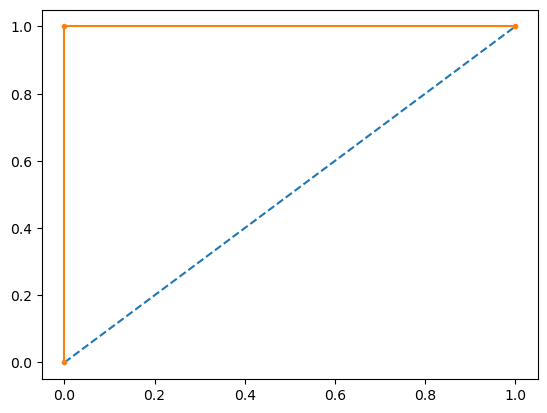

AUC: 1.000


In [12]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import time

print ( "Decision Tree ")
# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

start_time = time.time()
# Train the classifier on the training set
clf.fit(X1_train, y1_train)

time_required1 = time.time() - start_time
print('Time required for training: {} seconds'.format(time_required1))

# Make predictions on the testing set
y1_pred = clf.predict(X1_test)

# Calculate the metrics
accuracy = accuracy_score(y1_test, y1_pred)
precision = precision_score(y1_test, y1_pred, average='macro')
recall = recall_score(y1_test, y1_pred, average='macro')
f1 = f1_score(y1_test, y1_pred, average='macro')


# Print the results
print ("")
print ("Device 1 ")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")


probs = clf.predict_proba(X1_test)
probs = probs[:, 1] # we want positive outcome only, way roc_auc_score function works
fpr, tpr, thresholds = roc_curve(y1_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()
auc_score = roc_auc_score(y1_test, probs)
print('AUC: %.3f' % auc_score)


Time required for training: 6.7306129932403564 seconds

Device 2 
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


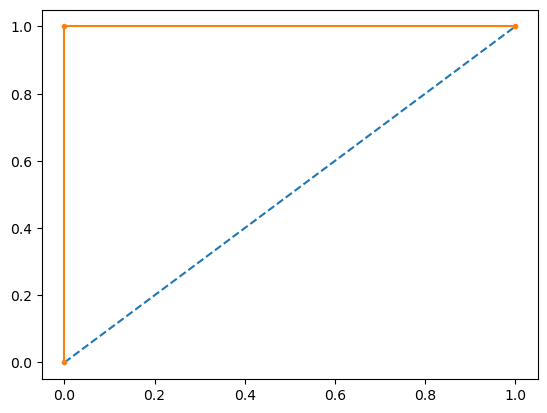

AUC: 1.000


In [13]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
start_time = time.time()
# Train the classifier on the training set
clf.fit(X2_train, y2_train)
time_required2 = time.time() - start_time
print('Time required for training: {} seconds'.format(time_required2))
# Make predictions on the testing set
y2_pred = clf.predict(X2_test)

# Calculate the metrics
accuracy = accuracy_score(y2_test, y2_pred)
precision = precision_score(y2_test, y2_pred, average='macro')
recall = recall_score(y2_test, y2_pred, average='macro')
f1 = f1_score(y2_test, y2_pred, average='macro')


# Print the results
print ("")
print ("Device 2 ")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")

probs = clf.predict_proba(X2_test)
probs = probs[:, 1] # we want positive outcome only, way roc_auc_score function works
fpr, tpr, thresholds = roc_curve(y2_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()
auc_score = roc_auc_score(y2_test, probs)
print('AUC: %.3f' % auc_score)

Time required for training: 5.319509983062744 seconds

Device 3 
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


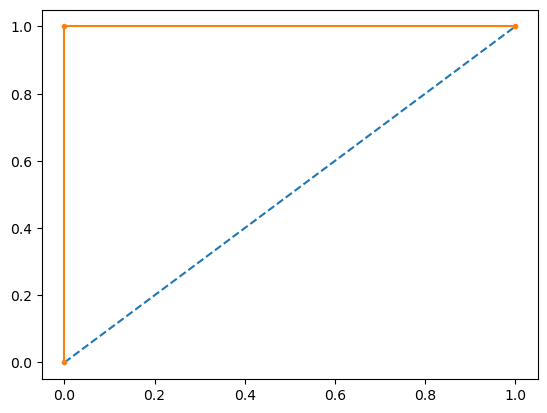

AUC: 1.000


In [14]:


# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
start_time = time.time()
# Train the classifier on the training set
clf.fit(X3_train, y3_train)
time_required3 = time.time() - start_time
print('Time required for training: {} seconds'.format(time_required3))

# Make predictions on the testing set
y3_pred = clf.predict(X3_test)

# Calculate the metrics
accuracy = accuracy_score(y3_test, y3_pred)
precision = precision_score(y3_test, y3_pred, average='macro')
recall = recall_score(y3_test, y3_pred, average='macro')
f1 = f1_score(y3_test, y3_pred, average='macro')


# Print the results
print ("")
print ("Device 3 ")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")

probs = clf.predict_proba(X3_test)
probs = probs[:, 1] # we want positive outcome only, way roc_auc_score function works
fpr, tpr, thresholds = roc_curve(y3_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()
auc_score = roc_auc_score(y3_test, probs)
print('AUC: %.3f' % auc_score)

Time required for training: 4.010328054428101 seconds

Device 4 
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


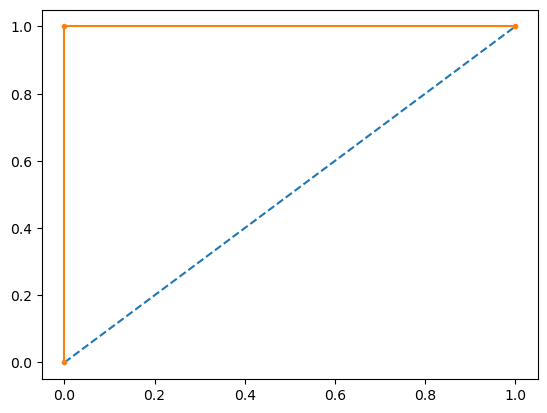

AUC: 1.000


In [15]:



# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
start_time = time.time()
# Train the classifier on the training set
clf.fit(X4_train, y4_train)
time_required4 = time.time() - start_time
print('Time required for training: {} seconds'.format(time_required4))
# Make predictions on the testing set
y4_pred = clf.predict(X4_test)

# Calculate the metrics
accuracy = accuracy_score(y4_test, y4_pred)
precision = precision_score(y4_test, y4_pred, average='macro')
recall = recall_score(y4_test, y4_pred, average='macro')
f1 = f1_score(y4_test, y4_pred, average='macro')


# Print the results
print ("")
print ("Device 4 ")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")

probs = clf.predict_proba(X4_test)
probs = probs[:, 1] # we want positive outcome only, way roc_auc_score function works
fpr, tpr, thresholds = roc_curve(y4_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()
auc_score = roc_auc_score(y4_test, probs)
print('AUC: %.3f' % auc_score)


Time required for training: 4.2650511264801025 seconds

Device 5 
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


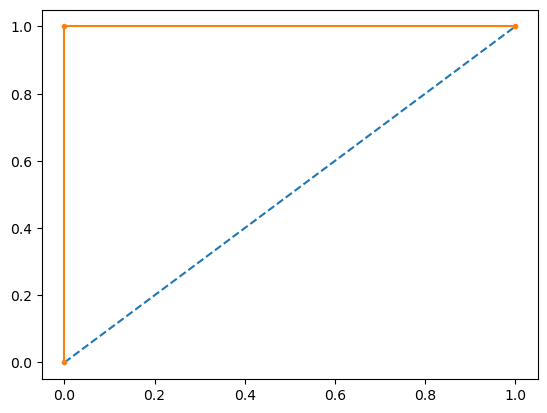

AUC: 1.000


In [16]:



# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
start_time = time.time()
# Train the classifier on the training set
clf.fit(X5_train, y5_train)
time_required5 = time.time() - start_time
print('Time required for training: {} seconds'.format(time_required5))

# Make predictions on the testing set
y5_pred = clf.predict(X5_test)

# Calculate the metrics
accuracy = accuracy_score(y5_test, y5_pred)
precision = precision_score(y5_test, y5_pred, average='macro')
recall = recall_score(y5_test, y5_pred, average='macro')
f1 = f1_score(y5_test, y5_pred, average='macro')


# Print the results
print ("")
print ("Device 5 ")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")

probs = clf.predict_proba(X5_test)
probs = probs[:, 1] # we want positive outcome only, way roc_auc_score function works
fpr, tpr, thresholds = roc_curve(y5_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()
auc_score = roc_auc_score(y5_test, probs)
print('AUC: %.3f' % auc_score)




Cross-validation scores: [1.         1.         1.         1.         0.99998505]

Device 5 
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


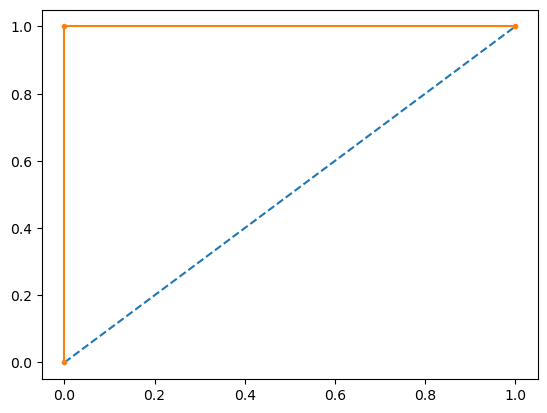

AUC: 1.000


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from matplotlib import pyplot

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Perform 5-fold cross-validation
scores = cross_val_score(clf, X5_train, y5_train, cv=5)

# Train the classifier on the full training set
clf.fit(X5_train, y5_train)

# Make predictions on the testing set
y5_pred = clf.predict(X5_test)

# Calculate the metrics
accuracy = accuracy_score(y5_test, y5_pred)
precision = precision_score(y5_test, y5_pred, average='macro')
recall = recall_score(y5_test, y5_pred, average='macro')
f1 = f1_score(y5_test, y5_pred, average='macro')

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Print the results
print("")
print("Device 5 ")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")

probs = clf.predict_proba(X5_test)
probs = probs[:, 1] # we want positive outcome only, way roc_auc_score function works
fpr, tpr, thresholds = roc_curve(y5_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()
auc_score = roc_auc_score(y5_test, probs)
print('AUC: %.3f' % auc_score)


Random Forest 
Time required for training: 27.689592838287354 seconds

Device 1 
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


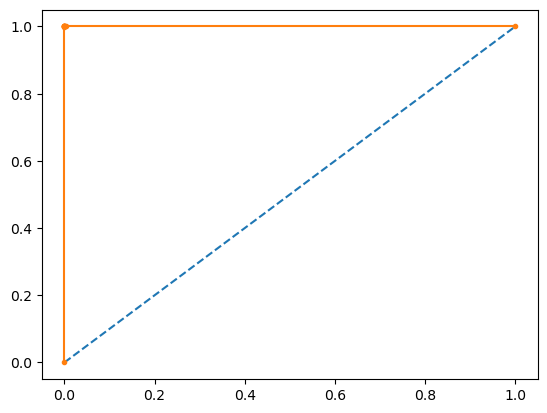

AUC: 1.000
Time required for training: 46.83871793746948 seconds

Device 2 
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


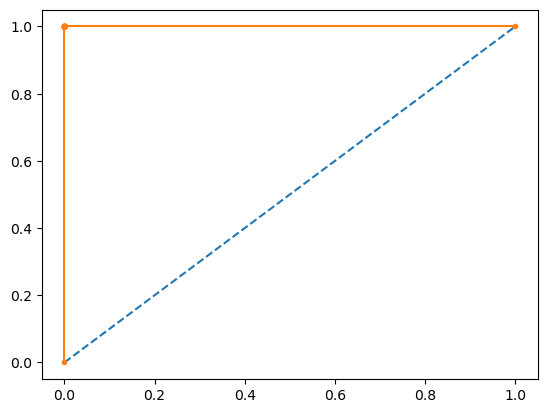

AUC: 1.000


In [18]:
print ( "Random Forest ")
# Create a decision tree classifier
from sklearn.ensemble import RandomForestClassifier
clfr = RandomForestClassifier(n_estimators = 30)

start_time = time.time()
clfr.fit(X1_train, y1_train)
time_required12 = time.time() - start_time

print('Time required for training: {} seconds'.format(time_required12))


# Make predictions on the testing set
y1_pred = clfr.predict(X1_test)

# Calculate the metrics
accuracy = accuracy_score(y1_test, y1_pred)
precision = precision_score(y1_test, y1_pred, average='macro')
recall = recall_score(y1_test, y1_pred, average='macro')
f1 = f1_score(y1_test, y1_pred, average='macro')



# Print the results
print ("")
print ("Device 1 ")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")

probs = clfr.predict_proba(X1_test)
probs = probs[:, 1] # we want positive outcome only, way roc_auc_score function works
fpr, tpr, thresholds = roc_curve(y1_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()
auc_score = roc_auc_score(y1_test, probs)
print('AUC: %.3f' % auc_score)

# Create a random forest classifier
clfr = RandomForestClassifier(n_estimators = 30)
start_time = time.time()
clfr.fit(X2_train, y2_train)
time_required22 = time.time() - start_time

print('Time required for training: {} seconds'.format(time_required22))

# Make predictions on the testing set
y2_pred = clfr.predict(X2_test)

# Calculate the metrics
accuracy = accuracy_score(y2_test, y2_pred)
precision = precision_score(y2_test, y2_pred, average='macro')
recall = recall_score(y2_test, y2_pred, average='macro')
f1 = f1_score(y2_test, y2_pred, average='macro')


# Print the results
print ("")
print ("Device 2 ")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")

probs = clfr.predict_proba(X2_test)
probs = probs[:, 1] # we want positive outcome only, way roc_auc_score function works
fpr, tpr, thresholds = roc_curve(y2_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()
auc_score = roc_auc_score(y2_test, probs)
print('AUC: %.3f' % auc_score)

#Compute ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y2_test, y2_pred)







Time required for training: 35.36556124687195 seconds

Device 3 
Accuracy: 0.9999946884793116
Precision: 0.9999857622871462
Recall: 0.999996735290853
F1 score: 0.9999912486823126


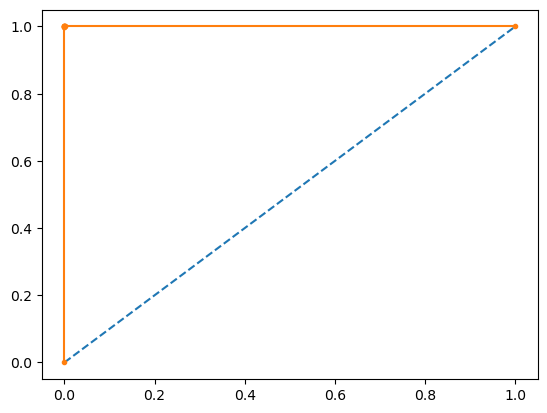

AUC: 1.000


In [61]:
clfr = RandomForestClassifier(n_estimators = 30)
start_time = time.time()
clfr.fit(X3_train, y3_train)
time_required23 = time.time() - start_time

print('Time required for training: {} seconds'.format(time_required23))

# Make predictions on the testing set
y3_pred = clfr.predict(X3_test)

# Calculate the metrics
accuracy = accuracy_score(y3_test, y3_pred)
precision = precision_score(y3_test, y3_pred, average='macro')
recall = recall_score(y3_test, y3_pred, average='macro')
f1 = f1_score(y3_test, y3_pred, average='macro')


# Print the results
print ("")
print ("Device 3 ")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")

probs = clfr.predict_proba(X3_test)
probs = probs[:, 1] # we want positive outcome only, way roc_auc_score function works
fpr, tpr, thresholds = roc_curve(y3_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()
auc_score = roc_auc_score(y3_test, probs)
print('AUC: %.3f' % auc_score)







Time required for training: 27.557524919509888 seconds

Device 4 
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


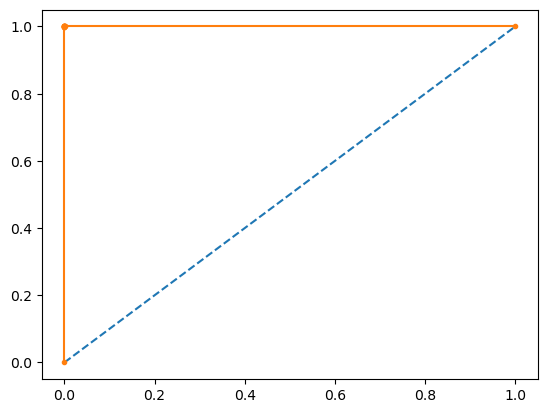

AUC: 1.000


In [62]:
clfr = RandomForestClassifier(n_estimators = 30)

start_time = time.time()
clfr.fit(X4_train, y4_train)
time_required24 = time.time() - start_time
print('Time required for training: {} seconds'.format(time_required24))

# Make predictions on the testing set
y4_pred = clfr.predict(X4_test)

# Calculate the metrics
accuracy = accuracy_score(y4_test, y4_pred)
precision = precision_score(y4_test, y4_pred, average='macro')
recall = recall_score(y4_test, y4_pred, average='macro')
f1 = f1_score(y4_test, y4_pred, average='macro')


# Print the results
print ("")
print ("Device 4 ")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")

probs = clfr.predict_proba(X4_test)
probs = probs[:, 1] # we want positive outcome only, way roc_auc_score function works
fpr, tpr, thresholds = roc_curve(y4_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()
auc_score = roc_auc_score(y4_test, probs)
print('AUC: %.3f' % auc_score)


Time required for training: 25.11057996749878 seconds

Device 5 
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


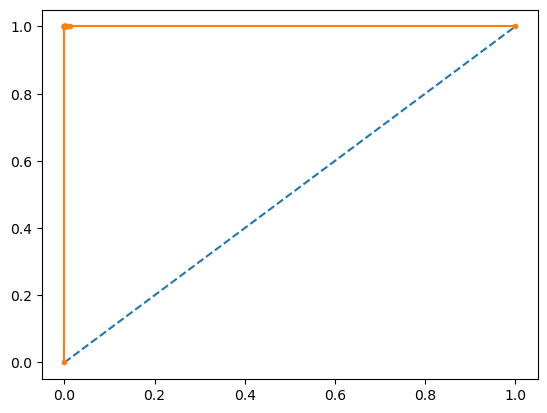

AUC: 1.000


In [64]:
clfr = RandomForestClassifier(n_estimators = 30)

start_time = time.time()
clfr.fit(X5_train, y5_train)
# Make predictions on the testing set

y5_pred = clfr.predict(X5_test)

time_required= time.time() - start_time
print('Time required for training: {} seconds'.format(time_required))


# Calculate the metrics
accuracy = accuracy_score(y5_test, y5_pred)
precision = precision_score(y5_test, y5_pred, average='macro')
recall = recall_score(y5_test, y5_pred, average='macro')
f1 = f1_score(y5_test, y5_pred, average='macro')


# Print the results
print ("")
print ("Device 5 ")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")

probs = clfr.predict_proba(X5_test)
probs = probs[:, 1] # we want positive outcome only, way roc_auc_score function works
fpr, tpr, thresholds = roc_curve(y5_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()
auc_score = roc_auc_score(y5_test, probs)
print('AUC: %.3f' % auc_score)



Naive Baiyes 
Time required for training: 2.371699810028076 seconds

Device 1 
Accuracy: 0.9511146027693215
Precision: 0.6712410894833967
Recall: 0.5004160791784571
F1 score: 0.4883742219964334


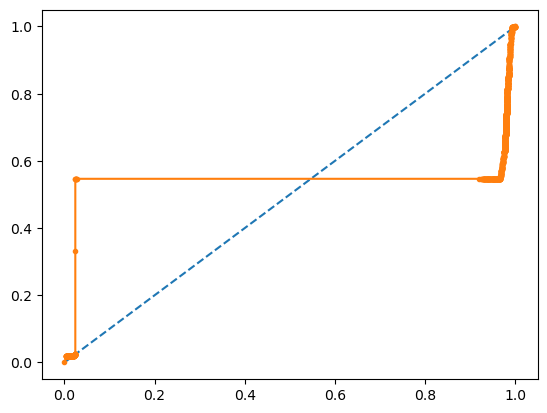

AUC: 0.542


In [65]:
print ( "Naive Baiyes ")
# Create a decision tree classifier
# Create LabelEncoder object
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
  
clfg = GaussianNB()

# # Convert labels to integers
# y1_train = y1_train.astype('int')
# y1_test = y1_test.astype('int')
start_time1 = time.time()
clfg.fit(X1_train, y1_train)
time_required31 = time.time() - start_time1
print('Time required for training: {} seconds'.format(time_required31))


# Make predictions on the testing set
y1_pred = clfg.predict(X1_test)

# Calculate the metrics
accuracy = accuracy_score(y1_test, y1_pred)
precision = precision_score(y1_test, y1_pred, average='macro')
recall = recall_score(y1_test, y1_pred, average='macro')
f1 = f1_score(y1_test, y1_pred, average='macro')


# Print the results
print("")
print("Device 1 ")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")

probs = clfg.predict_proba(X1_test)
probs = probs[:, 1] # we want positive outcome only, way roc_auc_score function works
fpr, tpr, thresholds = roc_curve(y1_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()
auc_score = roc_auc_score(y1_test, probs)
print('AUC: %.3f' % auc_score)





Naive Baiyes 
Time required for training: 1.058513879776001 seconds

Device 1 
Accuracy: 0.9511146027693215
Precision: 0.6712410894833967
Recall: 0.5004160791784571
F1 score: 0.4883742219964334


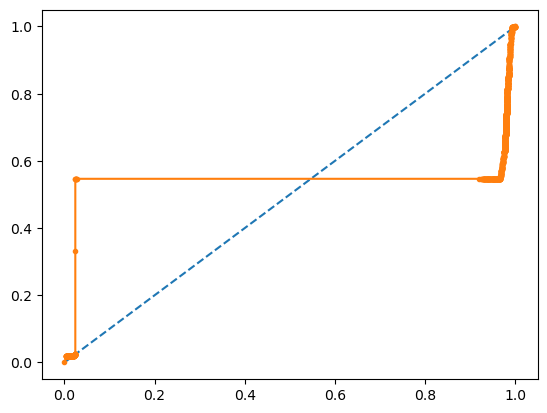

AUC: 0.542
Time required for training: 2.1264750957489014 seconds

Device 2 
Accuracy: 0.841232205919831
Precision: 0.8318068424120634
Recall: 0.5017134085969417
F1 score: 0.4604162963190293


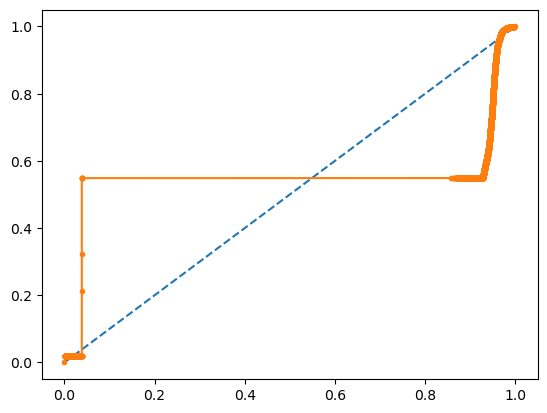

AUC: 0.551
Time required for training: 1.425523042678833 seconds

Device 3 
Accuracy: 0.8138152653104583
Precision: 0.7582201903955952
Recall: 0.50142698980031
F1 score: 0.45178925497551875


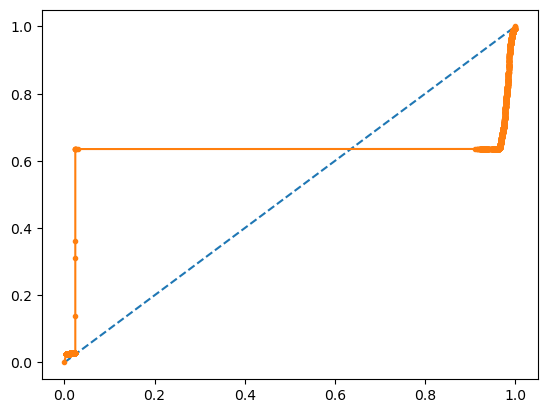

AUC: 0.627
Time required for training: 1.4327900409698486 seconds

Device 4 
Accuracy: 0.8820521092849163
Precision: 0.7550121965998504
Recall: 0.5006292494938861
F1 score: 0.47002362323165


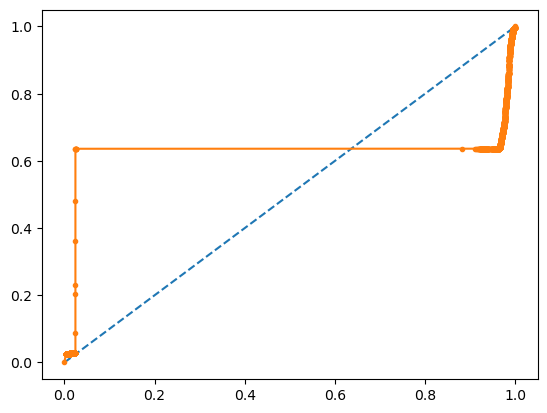

AUC: 0.628
Time required for training: 1.049687147140503 seconds

Device 5 
Accuracy: 0.9844894003924008
Precision: 0.5718988039937948
Recall: 0.5012532023969227
F1 score: 0.4987769564321518


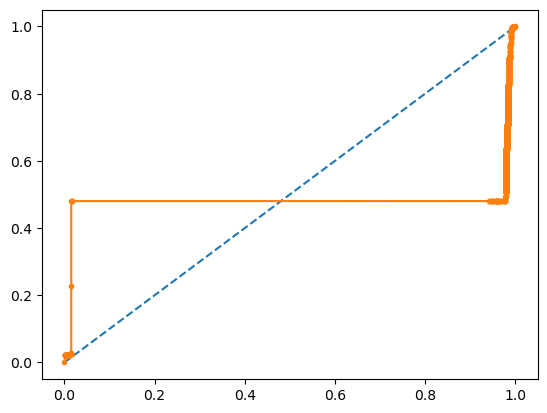

AUC: 0.482


In [66]:
print ( "Naive Baiyes ")
# Create a decision tree classifier
# Create LabelEncoder object
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
  
clfg = GaussianNB()

# # Convert labels to integers
# y1_train = y1_train.astype('int')
# y1_test = y1_test.astype('int')

start_time = time.time()
clfg.fit(X1_train, y1_train)
time_required31 = time.time() - start_time
print('Time required for training: {} seconds'.format(time_required31))

# Make predictions on the testing set
y1_pred = clfg.predict(X1_test)

# Calculate the metrics
accuracy = accuracy_score(y1_test, y1_pred)
precision = precision_score(y1_test, y1_pred, average='macro')
recall = recall_score(y1_test, y1_pred, average='macro')
f1 = f1_score(y1_test, y1_pred, average='macro')


# Print the results
print("")
print("Device 1 ")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")


probs = clfg.predict_proba(X1_test)
probs = probs[:, 1] # we want positive outcome only, way roc_auc_score function works
fpr, tpr, thresholds = roc_curve(y1_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()
auc_score = roc_auc_score(y1_test, probs)
print('AUC: %.3f' % auc_score)



# Create a decision tree classifier

clfg = GaussianNB()
start_time = time.time()
clfg.fit(X2_train, y2_train)
time_required31 = time.time() - start_time
print('Time required for training: {} seconds'.format(time_required31))

# Make predictions on the testing set
y2_pred = clfg.predict(X2_test)

# Calculate the metrics
accuracy = accuracy_score(y2_test, y2_pred)
precision = precision_score(y2_test, y2_pred, average='macro')
recall = recall_score(y2_test, y2_pred, average='macro')
f1 = f1_score(y2_test, y2_pred, average='macro')


# Print the results
print("")
print("Device 2 ")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")

probs = clfg.predict_proba(X2_test)
probs = probs[:, 1] # we want positive outcome only, way roc_auc_score function works
fpr, tpr, thresholds = roc_curve(y2_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()
auc_score = roc_auc_score(y2_test, probs)
print('AUC: %.3f' % auc_score)



clfg = GaussianNB()
start_time = time.time()
clfg.fit(X3_train, y3_train)
time_required31 = time.time() - start_time
print('Time required for training: {} seconds'.format(time_required31))

# Make predictions on the testing set
y3_pred = clfg.predict(X3_test)

# Calculate the metrics
accuracy = accuracy_score(y3_test, y3_pred)
precision = precision_score(y3_test, y3_pred, average='macro')
recall = recall_score(y3_test, y3_pred, average='macro')
f1 = f1_score(y3_test, y3_pred, average='macro')


# Print the results
print("")
print("Device 3 ")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")


probs = clfg.predict_proba(X4_test)
probs = probs[:, 1] # we want positive outcome only, way roc_auc_score function works
fpr, tpr, thresholds = roc_curve(y4_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()
auc_score = roc_auc_score(y4_test, probs)
print('AUC: %.3f' % auc_score)






clfg = GaussianNB()
start_time = time.time()
clfg.fit(X4_train, y4_train)
time_required31 = time.time() - start_time
print('Time required for training: {} seconds'.format(time_required31))

# Make predictions on the testing set
y4_pred = clfg.predict(X4_test)

# Calculate the metrics
accuracy = accuracy_score(y4_test, y4_pred)
precision = precision_score(y4_test, y4_pred, average='macro')
recall = recall_score(y4_test, y4_pred, average='macro')
f1 = f1_score(y4_test, y4_pred, average='macro')



# Print the results
print("")
print("Device 4 ")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")


probs = clfg.predict_proba(X4_test)
probs = probs[:, 1] # we want positive outcome only, way roc_auc_score function works
fpr, tpr, thresholds = roc_curve(y4_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()
auc_score = roc_auc_score(y4_test, probs)
print('AUC: %.3f' % auc_score)



clfg = GaussianNB()
start_time = time.time()
clfg.fit(X5_train, y5_train)
time_required31 = time.time() - start_time
print('Time required for training: {} seconds'.format(time_required31))
# Make predictions on the testing set
y5_pred = clfg.predict(X5_test)

# Calculate the metrics
accuracy = accuracy_score(y5_test, y5_pred)
precision = precision_score(y5_test, y5_pred, average='macro')
recall = recall_score(y5_test, y5_pred, average='macro')
f1 = f1_score(y5_test, y5_pred, average='macro')




# Print the results
print("")
print("Device 5 ")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")


probs = clfg.predict_proba(X5_test)
probs = probs[:, 1] # we want positive outcome only, way roc_auc_score function works
fpr, tpr, thresholds = roc_curve(y5_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()
auc_score = roc_auc_score(y5_test, probs)
print('AUC: %.3f' % auc_score)




Naive Baiyes 

Device 1 
Accuracy: 0.9511146027693215
Precision: 0.6712410894833967
Recall: 0.5004160791784571
F1 score: 0.4883742219964334


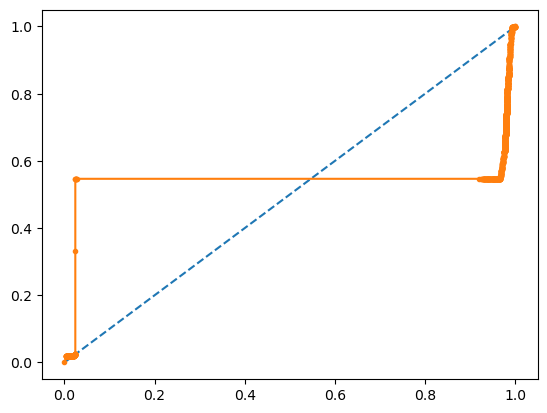

AUC: 0.542

Device 2 
Accuracy: 0.841232205919831
Precision: 0.8318068424120634
Recall: 0.5017134085969417
F1 score: 0.4604162963190293


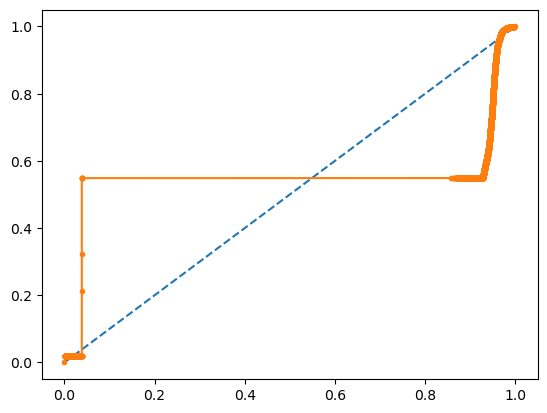

AUC: 0.551

Device 3 
Accuracy: 0.8138152653104583
Precision: 0.7582201903955952
Recall: 0.50142698980031
F1 score: 0.45178925497551875


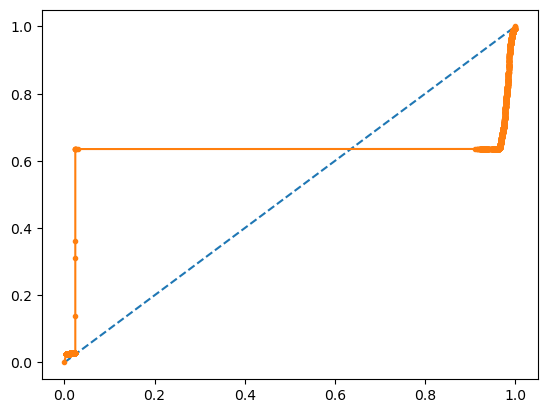

AUC: 0.627

Device 4 
Accuracy: 0.8820521092849163
Precision: 0.7550121965998504
Recall: 0.5006292494938861
F1 score: 0.47002362323165


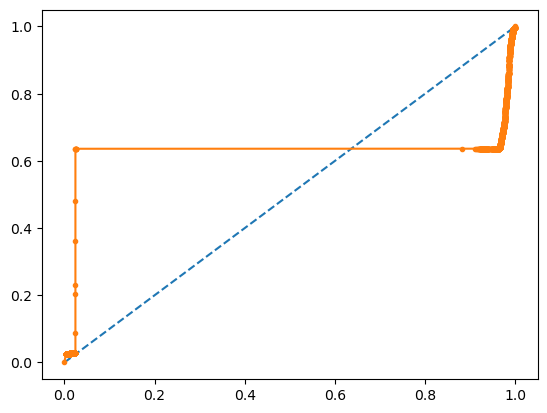

AUC: 0.628

Device 5 
Accuracy: 0.9844894003924008
Precision: 0.5718988039937948
Recall: 0.5012532023969227
F1 score: 0.4987769564321518


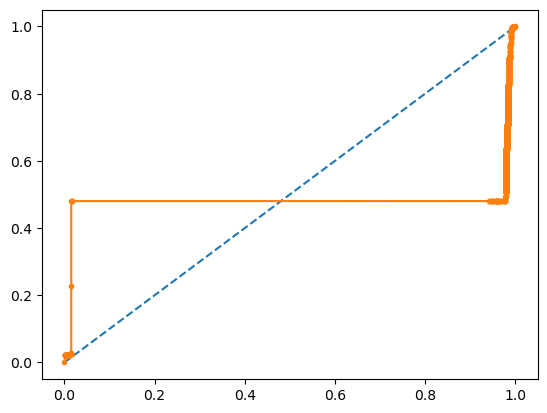

AUC: 0.482


In [67]:
print ( "Naive Baiyes ")
# Create a decision tree classifier
# Create LabelEncoder object
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
  
clfg = GaussianNB()

# # Convert labels to integers
# y1_train = y1_train.astype('int')
# y1_test = y1_test.astype('int')

clfg.fit(X1_train, y1_train)

# Make predictions on the testing set
y1_pred = clfg.predict(X1_test)

# Calculate the metrics
accuracy = accuracy_score(y1_test, y1_pred)
precision = precision_score(y1_test, y1_pred, average='macro')
recall = recall_score(y1_test, y1_pred, average='macro')
f1 = f1_score(y1_test, y1_pred, average='macro')


# Print the results
print("")
print("Device 1 ")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")


probs = clfg.predict_proba(X1_test)
probs = probs[:, 1] # we want positive outcome only, way roc_auc_score function works
fpr, tpr, thresholds = roc_curve(y1_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()
auc_score = roc_auc_score(y1_test, probs)
print('AUC: %.3f' % auc_score)



# Create a decision tree classifier

clfg = GaussianNB()
clfg.fit(X2_train, y2_train)

# Make predictions on the testing set
y2_pred = clfg.predict(X2_test)

# Calculate the metrics
accuracy = accuracy_score(y2_test, y2_pred)
precision = precision_score(y2_test, y2_pred, average='macro')
recall = recall_score(y2_test, y2_pred, average='macro')
f1 = f1_score(y2_test, y2_pred, average='macro')


# Print the results
print("")
print("Device 2 ")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")

probs = clfg.predict_proba(X2_test)
probs = probs[:, 1] # we want positive outcome only, way roc_auc_score function works
fpr, tpr, thresholds = roc_curve(y2_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()
auc_score = roc_auc_score(y2_test, probs)
print('AUC: %.3f' % auc_score)



clfg = GaussianNB()
clfg.fit(X3_train, y3_train)

# Make predictions on the testing set
y3_pred = clfg.predict(X3_test)

# Calculate the metrics
accuracy = accuracy_score(y3_test, y3_pred)
precision = precision_score(y3_test, y3_pred, average='macro')
recall = recall_score(y3_test, y3_pred, average='macro')
f1 = f1_score(y3_test, y3_pred, average='macro')


# Print the results
print("")
print("Device 3 ")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")


probs = clfg.predict_proba(X4_test)
probs = probs[:, 1] # we want positive outcome only, way roc_auc_score function works
fpr, tpr, thresholds = roc_curve(y4_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()
auc_score = roc_auc_score(y4_test, probs)
print('AUC: %.3f' % auc_score)






clfg = GaussianNB()
clfg.fit(X4_train, y4_train)

# Make predictions on the testing set
y4_pred = clfg.predict(X4_test)

# Calculate the metrics
accuracy = accuracy_score(y4_test, y4_pred)
precision = precision_score(y4_test, y4_pred, average='macro')
recall = recall_score(y4_test, y4_pred, average='macro')
f1 = f1_score(y4_test, y4_pred, average='macro')



# Print the results
print("")
print("Device 4 ")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")


probs = clfg.predict_proba(X4_test)
probs = probs[:, 1] # we want positive outcome only, way roc_auc_score function works
fpr, tpr, thresholds = roc_curve(y4_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()
auc_score = roc_auc_score(y4_test, probs)
print('AUC: %.3f' % auc_score)



clfg = GaussianNB()
clfg.fit(X5_train, y5_train)
# Make predictions on the testing set
y5_pred = clfg.predict(X5_test)

# Calculate the metrics
accuracy = accuracy_score(y5_test, y5_pred)
precision = precision_score(y5_test, y5_pred, average='macro')
recall = recall_score(y5_test, y5_pred, average='macro')
f1 = f1_score(y5_test, y5_pred, average='macro')




# Print the results
print("")
print("Device 5 ")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")


probs = clfg.predict_proba(X5_test)
probs = probs[:, 1] # we want positive outcome only, way roc_auc_score function works
fpr, tpr, thresholds = roc_curve(y5_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()
auc_score = roc_auc_score(y5_test, probs)
print('AUC: %.3f' % auc_score)

/Users/belsabel/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/belsabel/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Device 1 
Accuracy: 0.04886084650888736
Precision: 0.02443042325444368
Recall: 0.5
F1 score: 0.04658467962792179


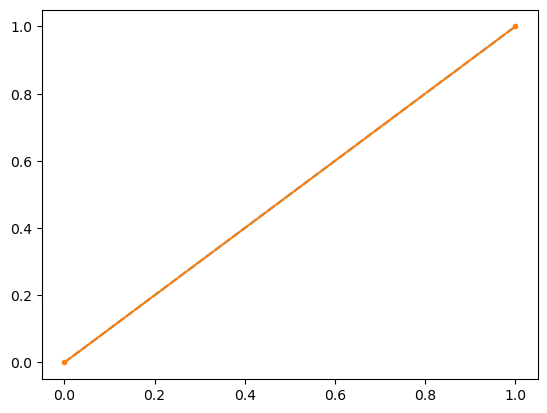

AUC: 0.500


In [33]:

from sklearn.linear_model import LogisticRegression

clfl = LogisticRegression(max_iter = 1200000)
clfl.fit(X1_train, y1_train)

# Make predictions on the testing set
y1_pred = clfl.predict(X1_test)

# Calculate the metrics
accuracy = accuracy_score(y1_test, y1_pred)
precision = precision_score(y1_test, y1_pred, average='macro')
recall = recall_score(y1_test, y1_pred, average='macro')
f1 = f1_score(y1_test, y1_pred, average='macro')


# Print the results
print("")
print("Device 1 ")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")


probs = clfl.predict_proba(X1_test)
probs = probs[:, 1] # we want positive outcome only, way roc_auc_score function works
fpr, tpr, thresholds = roc_curve(y1_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()
auc_score = roc_auc_score(y1_test, probs)
print('AUC: %.3f' % auc_score)



In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as pyplot

print ("K nearest Neighbour ")
#Create a decision tree classifier

clfk = KNeighborsClassifier(n_neighbors=5)
clfk.fit(X1_train, y1_train)

# Make predictions on the testing set
y1_pred = clfk.predict(X1_test)

# Calculate the metrics
accuracy = accuracy_score(y1_test, y1_pred)
precision = precision_score(y1_test, y1_pred, average='macro')
recall = recall_score(y1_test, y1_pred, average='macro')
f1 = f1_score(y1_test, y1_pred, average='macro')


# Print the results
print ("")
print ("Device 1 ")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")

probs = clfk.predict_proba(X1_test)
probs = probs[:, 1] # we want positive outcome only, way roc_auc_score function works
fpr, tpr, thresholds = roc_curve(y1_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()
auc_score = roc_auc_score(y1_test, probs)
print('AUC: %.3f' % auc_score)


K nearest Neighbour 


AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:

from sklearn.svm import SVC

clfs = SVC(gamma = 'scale')
clfs.fit(X1_train, y1_train)

# Make predictions on the testing set
y1_pred = clfs.predict(X1_test)

# Calculate the metrics
accuracy = accuracy_score(y1_test, y1_pred)
precision = precision_score(y1_test, y1_pred, average='macro')
recall = recall_score(y1_test, y1_pred, average='macro')
f1 = f1_score(y1_test, y1_pred, average='macro')


# Print the results
print("")
print("Device 1 ")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")


probs = clfs.predict_proba(X1_test)
probs = probs[:, 1] # we want positive outcome only, way roc_auc_score function works
fpr, tpr, thresholds = roc_curve(y1_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()
auc_score = roc_auc_score(y1_test, probs)
print('AUC: %.3f' % auc_score)






In [ ]:
print ( "Naive Baiyes ")
# Create a decision tree classifier
# Create LabelEncoder object
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
  
clfg = GaussianNB()

# # Convert labels to integers
# y1_train = y1_train.astype('int')
# y1_test = y1_test.astype('int')

clfg.fit(X1_train, y1_train)

# Make predictions on the testing set
y1_pred = clfg.predict(X1_test)

# Calculate the metrics
accuracy = accuracy_score(y1_test, y1_pred)
precision = precision_score(y1_test, y1_pred, average='macro')
recall = recall_score(y1_test, y1_pred, average='macro')
f1 = f1_score(y1_test, y1_pred, average='macro')


# Print the results
print("")
print("Device 1 ")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")


probs = clfg.predict_proba(X1_test)
probs = probs[:, 1] # we want positive outcome only, way roc_auc_score function works
fpr, tpr, thresholds = roc_curve(y1_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()
auc_score = roc_auc_score(y1_test, probs)
print('AUC: %.3f' % auc_score)



# Create a decision tree classifier

clfg = GaussianNB()
clfg.fit(X2_train, y2_train)

# Make predictions on the testing set
y2_pred = clfg.predict(X2_test)

# Calculate the metrics
accuracy = accuracy_score(y2_test, y2_pred)
precision = precision_score(y2_test, y2_pred, average='macro')
recall = recall_score(y2_test, y2_pred, average='macro')
f1 = f1_score(y2_test, y2_pred, average='macro')


# Print the results
print("")
print("Device 2 ")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")

probs = clfg.predict_proba(X2_test)
probs = probs[:, 1] # we want positive outcome only, way roc_auc_score function works
fpr, tpr, thresholds = roc_curve(y2_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()
auc_score = roc_auc_score(y2_test, probs)
print('AUC: %.3f' % auc_score)



clfg = GaussianNB()
clfg.fit(X3_train, y3_train)

# Make predictions on the testing set
y3_pred = clfg.predict(X3_test)

# Calculate the metrics
accuracy = accuracy_score(y3_test, y3_pred)
precision = precision_score(y3_test, y3_pred, average='macro')
recall = recall_score(y3_test, y3_pred, average='macro')
f1 = f1_score(y3_test, y3_pred, average='macro')


# Print the results
print("")
print("Device 3 ")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")


probs = clfg.predict_proba(X4_test)
probs = probs[:, 1] # we want positive outcome only, way roc_auc_score function works
fpr, tpr, thresholds = roc_curve(y4_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()
auc_score = roc_auc_score(y4_test, probs)
print('AUC: %.3f' % auc_score)






clfg = GaussianNB()
clfg.fit(X4_train, y4_train)

# Make predictions on the testing set
y4_pred = clfg.predict(X4_test)

# Calculate the metrics
accuracy = accuracy_score(y4_test, y4_pred)
precision = precision_score(y4_test, y4_pred, average='macro')
recall = recall_score(y4_test, y4_pred, average='macro')
f1 = f1_score(y4_test, y4_pred, average='macro')



# Print the results
print("")
print("Device 4 ")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")


probs = clfg.predict_proba(X4_test)
probs = probs[:, 1] # we want positive outcome only, way roc_auc_score function works
fpr, tpr, thresholds = roc_curve(y4_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()
auc_score = roc_auc_score(y4_test, probs)
print('AUC: %.3f' % auc_score)



clfg = GaussianNB()
clfg.fit(X5_train, y5_train)
# Make predictions on the testing set
y5_pred = clfg.predict(X5_test)

# Calculate the metrics
accuracy = accuracy_score(y5_test, y5_pred)
precision = precision_score(y5_test, y5_pred, average='macro')
recall = recall_score(y5_test, y5_pred, average='macro')
f1 = f1_score(y5_test, y5_pred, average='macro')




# Print the results
print("")
print("Device 5 ")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")


probs = clfg.predict_proba(X5_test)
probs = probs[:, 1] # we want positive outcome only, way roc_auc_score function works
fpr, tpr, thresholds = roc_curve(y5_test, probs)
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()
auc_score = roc_auc_score(y5_test, probs)
print('AUC: %.3f' % auc_score)